In [196]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics 
from sklearn.preprocessing import StandardScaler

In [190]:
train = pd.read_csv("C:/Users/spandan/Downloads/graduate-admissions/Admission_Predict_Ver1.1.csv")
train_x = train.iloc[:, 0:7]
train_y = train.iloc[:, -1]
training, val, pred, val_y = train_test_split(train_x, train_y, test_size = 0.2, random_state = 2000) 
train.describe()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [191]:
train.corr(method='pearson')

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [192]:
train["COA>0.75"] = train["Chance"]>0.75

In [193]:
train.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance,COA>0.75
0,337,118,4,4.5,4.5,9.65,1,0.92,True
1,324,107,4,4.0,4.5,8.87,1,0.76,True
2,316,104,3,3.0,3.5,8.00,1,0.72,False
3,322,110,3,3.5,2.5,8.67,1,0.80,True
4,314,103,2,2.0,3.0,8.21,0,0.65,False


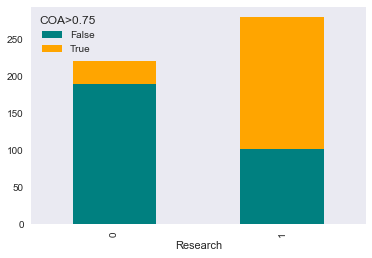

In [197]:
temp = pd.crosstab(train['Research'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


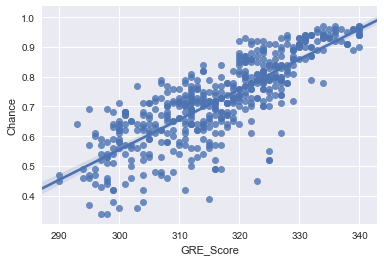

In [198]:
sns.set(color_codes=True)
Scatter = sns.regplot(x="GRE_Score", y="Chance", data=train)

In [199]:
tu = train.columns
x = tu[0:6]
print(x)

Index(['GRE_Score', 'TOEFL_Score', 'University Rating', 'SOP', 'LOR ', 'CGPA'], dtype='object')


C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


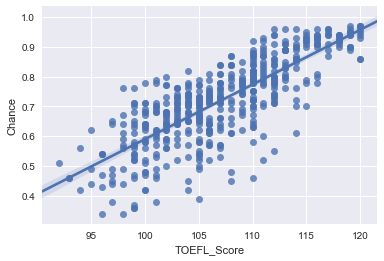

In [200]:
import seaborn as sns; sns.set(color_codes=True)
Scatter = sns.regplot(x="TOEFL_Score", y="Chance", data=train)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


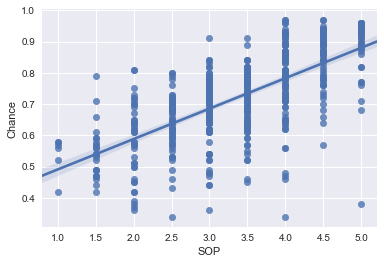

In [201]:
import seaborn as sns; sns.set(color_codes=True)
Scatter = sns.regplot(x="SOP", y="Chance", data=train)

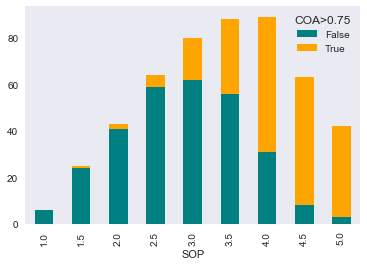

In [202]:
temp = pd.crosstab(train['SOP'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

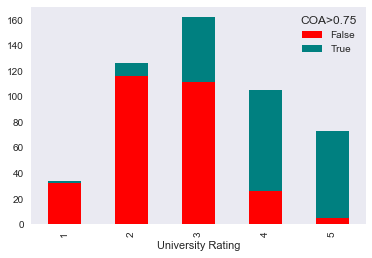

In [203]:
temp = pd.crosstab(train['University Rating'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['red', 'teal'], grid = False)

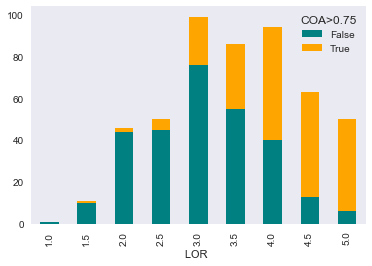

In [204]:
temp = pd.crosstab(train['LOR '],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['teal', 'orange'], grid = False)

In [205]:
bucket = np.linspace(6.5,10,6)
train["CGPA_bins"] = pd.cut(train["CGPA"],bucket)

In [206]:
train.head()

,GRE_Score,TOEFL_Score,University Rating,SOP,LOR,CGPA,Research,Chance,COA>0.75,CGPA_bins
0,337,118,4,4.5,4.5,9.65,1,0.92,True,"(9.3, 10.0]"
1,324,107,4,4.0,4.5,8.87,1,0.76,True,"(8.6, 9.3]"
2,316,104,3,3.0,3.5,8.00,1,0.72,False,"(7.9, 8.6]"
3,322,110,3,3.5,2.5,8.67,1,0.80,True,"(8.6, 9.3]"
4,314,103,2,2.0,3.0,8.21,0,0.65,False,"(7.9, 8.6]"


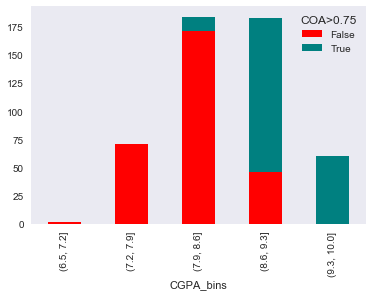

In [207]:
temp = pd.crosstab(train['CGPA_bins'],train['COA>0.75'])
temp.plot(kind = 'bar', stacked = True, color = ['red', 'teal'], grid = False)

C:\Users\spandan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\spandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\spandan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


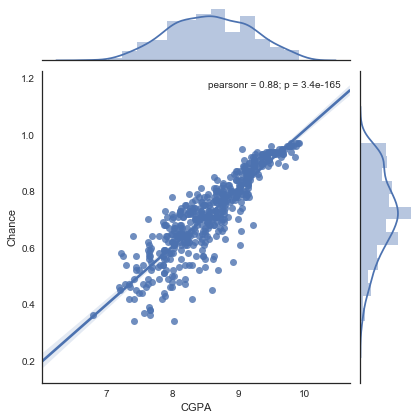

In [211]:
with sns.axes_style('white'):
    sns.jointplot("CGPA", "Chance", train, kind='reg')

In [212]:
reg = linear_model.LinearRegression() 
reg.fit(training, pred)
predictions = reg.predict(val)
print((predictions))
err = abs(predictions - val_y)
print(round(np.mean(err), 2), "degrees")
mean_p = 100*(err/val_y)
acc = 100 - np.mean(mean_p)
print("Accuracy: ", round(acc, 2), "%")

[0.91060365 0.75461156 0.61789945 0.85622052 0.63662014 0.51107435
 0.69414322 0.61914898 0.95992093 0.96383543 0.74321167 0.74394063
 0.74352034 0.77322152 0.58378158 0.9504175  0.43471044 0.83842408
 0.56409265 0.65291289 0.72332775 0.79101692 0.76192987 0.77932059
 0.9324581  0.79725432 0.53898892 0.79188383 0.70058506 0.52856153
 0.72442642 0.68085274 0.87827165 0.82388942 0.62643952 0.51640505
 0.54489899 0.78595127 0.64946087 0.90357472 0.69955036 0.860424
 0.57977807 0.62823491 0.6821186  0.77610812 0.61774797 0.96702586
 0.70417502 0.86143503 0.66063045 0.78069673 0.77022845 0.75115436
 0.81560754 0.73258044 0.58638384 0.87225947 0.7358472  0.62225041
 0.84376534 0.74411784 0.53364752 0.9092085  0.82342322 0.88801359
 0.80544516 0.84565266 0.67603358 0.65819858 0.85435054 0.82499876
 0.51835575 0.56511953 0.90552076 0.73186267 0.86987816 0.61470418
 0.79640509 0.77260137 0.71124567 0.90600046 0.86358499 0.73527604
 0.796492   0.53468369 0.55451625 0.80675103 0.72285863 0.733132

In [213]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
model = RandomForestRegressor(n_estimators = 100, random_state = 15, oob_score = True)
model.fit(training, pred)
predictions = model.predict(val)
print((predictions))
# prediction = pd.DataFrame(predictions, columns = ['score']).to_csv("C:/Users/spandan/Desktop/Aliens_Dataset_v1/Aliens_Dataset_v1/submission10.csv", index = False)
err = abs(predictions - val_y)
print(round(np.mean(err), 2), "degrees")
mean_p = 100*(err/val_y)
acc = 100 - np.mean(mean_p)
print("Accuracy: ", round(acc, 2), "%")

[0.9234 0.7683 0.6451 0.8564 0.6897 0.4867 0.6976 0.6808 0.9226 0.9515
 0.7257 0.6208 0.7768 0.7473 0.5955 0.9397 0.4776 0.8122 0.6119 0.6026
 0.7035 0.7838 0.743  0.7652 0.932  0.7535 0.5306 0.83   0.6992 0.5375
 0.7009 0.707  0.8867 0.8278 0.6253 0.4697 0.578  0.7014 0.6671 0.9191
 0.7045 0.8973 0.5593 0.658  0.695  0.6811 0.6388 0.9545 0.7115 0.8933
 0.6926 0.7524 0.7681 0.7516 0.7988 0.7469 0.5835 0.9152 0.7459 0.6542
 0.8615 0.769  0.5539 0.9153 0.7991 0.8885 0.7931 0.8346 0.6694 0.6716
 0.8491 0.8291 0.4349 0.5273 0.9203 0.7346 0.8947 0.6458 0.8097 0.7811
 0.6832 0.9157 0.8631 0.7365 0.8265 0.5134 0.4993 0.8061 0.6086 0.6744
 0.6404 0.897  0.5941 0.7139 0.8461 0.6915 0.6252 0.6919 0.6421 0.7865]
0.05 degrees
Accuracy:  91.71 %
